In [2]:
import os
import sys
from pathlib import Path
import pandas
import numpy
import json

In [ ]:
projectpath = '/Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia'
datapath = os.path.join(projectpath, 'data/BIDS_Berlin_ECOG_LFP/rawdata')
codepath = os.path.join(projectpath, 'code')


In [128]:
# bids example
from sklearn import linear_model, metrics, model_selection


In [127]:
py_nmd_path = os.path.join(codepath, 'py_neuromodulation_0_01')
os.chdir(py_nmd_path)
from pyneuromodulation import nm_BidsStream, nm_analysis
# required packages: imblearn, xgboost
# os.chdir(codepath)


In [59]:
py_nmd_path

'/Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01'

In [88]:
pathrun = f'{py_nmd_path}/examples/data/sub-testsub/ses-EphysMedOff/ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr'
pathbids = f'{py_nmd_path}/examples/data/'
pathout = f'{py_nmd_path}/examples/data/derivatives'

In [51]:
PATH_BIDS = os.path.abspath("examples\\data")
PATH_RUN = os.path.abspath("py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-TEST_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr")
PATH_OUT = os.path.abspath(os.path.join('examples', 'data', 'derivatives'))

### bids_example

In [90]:
pn_stream = nm_BidsStream.BidsStream(PATH_RUN=pathrun,
    PATH_BIDS=pathbids,
    PATH_OUT=pathout)

"""
ValueError: Entities in filename not ordered correctly. 
"sub" should have occurred earlier in the filename 
"/Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/
code/py_neuromodulation_0_01/py_neuromodulation\examples\
data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr"

-> solved after not using os.path.abspath
"""

Extracting parameters from /Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01/examples/data/sub-testsub/ses-EphysMedOff/ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from /Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01/examples/data/sub-testsub/ses-EphysMedOff/ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_channels.tsv.
Reading in coordinate system frame MNI152NLin2009bAsym: None.
Reading electrode coords from /Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01/examples/data/sub-testsub/ses-EphysMedOff/ieeg/sub-testsub_ses-EphysMedOff_acq-StimOff_space-mni_electrodes.tsv.


--- Logging error ---
Traceback (most recent call last):
  File "/Users/jeroenhabets/anaconda3/envs/ecog_dysk/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/Users/jeroenhabets/anaconda3/envs/ecog_dysk/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/Users/jeroenhabets/anaconda3/envs/ecog_dysk/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/Users/jeroenhabets/anaconda3/envs/ecog_dysk/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/jeroenhabets/anaconda3/envs/ecog_dysk/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/jeroenhabets/anaconda3/envs/ecog_dysk/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/

'\nValueError: Entities in filename not ordered correctly. \n"sub" should have occurred earlier in the filename \n"/Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/\ncode/py_neuromodulation_0_01/py_neuromodulation\\examplesdata\\sub-testsub\\ses-EphysMedOff\\ieeg\\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr"\n'

In [91]:
pn_stream.nm_channels

,name,rereference,used,target,type,status,new_name
0,ANALOG_R_ROTA_CH,None,0,0,misc,good,ANALOG_R_ROTA_CH
1,ECOG_L_1_SMC_AT,average,1,0,ecog,good,ECOG_L_1_SMC_AT-avgref
2,ECOG_L_2_SMC_AT,average,1,0,ecog,good,ECOG_L_2_SMC_AT-avgref
3,ECOG_L_3_SMC_AT,average,1,0,ecog,good,ECOG_L_3_SMC_AT-avgref
4,ECOG_L_4_SMC_AT,average,1,0,ecog,good,ECOG_L_4_SMC_AT-avgref
5,ECOG_L_5_SMC_AT,average,1,0,ecog,good,ECOG_L_5_SMC_AT-avgref
6,ECOG_L_6_SMC_AT,average,1,0,ecog,good,ECOG_L_6_SMC_AT-avgref
7,EEG_AO,None,0,0,misc,good,EEG_AO
8,LFP_L_1_STN_BS,LFP_L_567_STN_BS,1,0,seeg,good,LFP_L_1_STN_BS-LFP_L_567_STN_BS
9,LFP_L_234_STN_BS,LFP_L_1_STN_BS,1,0,seeg,good,LFP_L_234_STN_BS-LFP_L_1_STN_BS


In [92]:
pn_stream.settings

{'out_path': 'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\rt_example',
 'sampling_rate_features': 10,
 'methods': {'raw_resampling': True,
  'raw_normalization': False,
  'feature_normalization': True,
  'kalman_filter': True,
  're_referencing': True,
  'notch_filter': True,
  'bandpass_filter': False,
  'stft': True,
  'fft': False,
  'raw_hjorth': True,
  'sharpwave_analysis': True,
  'return_raw': True,
  'project_cortex': True,
  'project_subcortex': True,
  'coherence': True},
 'raw_resampling_settings': {'resample_freq': 1000},
 'raw_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'kalman_filter_settings': {'Tp': 0.1,
  'sigma_w': 0.7,
  'sigma_v': 1,
  'frequency_bands': ['theta',
   'alpha',
   'low beta',
   'high beta',
   'low gamma',
   'high gamma',
   'HFA']},
 'stft_settings': {'windowle

In [93]:
pn_stream.run_bids()

1.0 seconds of data processed
Last batch took: 0.13 seconds
1.1 seconds of data processed
Last batch took: 0.04 seconds
1.2 seconds of data processed
Last batch took: 0.05 seconds
1.3 seconds of data processed
Last batch took: 0.05 seconds
1.4 seconds of data processed
Last batch took: 0.06 seconds
1.5 seconds of data processed
Last batch took: 0.06 seconds
1.6 seconds of data processed
Last batch took: 0.05 seconds
1.7 seconds of data processed
Last batch took: 0.04 seconds
1.8 seconds of data processed
Last batch took: 0.05 seconds
1.9 seconds of data processed
Last batch took: 0.05 seconds
2.0 seconds of data processed
Last batch took: 0.06 seconds
2.1 seconds of data processed
Last batch took: 0.06 seconds
2.2 seconds of data processed
Last batch took: 0.05 seconds
2.3 seconds of data processed
Last batch took: 0.05 seconds
2.4 seconds of data processed
Last batch took: 0.05 seconds
2.5 seconds of data processed
Last batch took: 0.05 seconds
2.6 seconds of data processed
Last batch

In [137]:
feat_arr = pn_stream.feature_arr

In [148]:
from itertools import compress

In [179]:
selword = 'beta' #'LFP_L_234_STN_'  # raw
sellist = list(compress(feat_arr.keys(), [ selword in k for k in feat_arr.keys()]))
print(f'Nr features containing {selword}: {len(sellist)}\n {sellist}')

Nr features containing beta: 64
 ['ECOG_L_1_SMC_AT-avgref_stft_low beta', 'ECOG_L_1_SMC_AT-avgref_stft_high beta', 'ECOG_L_2_SMC_AT-avgref_stft_low beta', 'ECOG_L_2_SMC_AT-avgref_stft_high beta', 'ECOG_L_3_SMC_AT-avgref_stft_low beta', 'ECOG_L_3_SMC_AT-avgref_stft_high beta', 'ECOG_L_4_SMC_AT-avgref_stft_low beta', 'ECOG_L_4_SMC_AT-avgref_stft_high beta', 'ECOG_L_5_SMC_AT-avgref_stft_low beta', 'ECOG_L_5_SMC_AT-avgref_stft_high beta', 'ECOG_L_6_SMC_AT-avgref_stft_low beta', 'ECOG_L_6_SMC_AT-avgref_stft_high beta', 'LFP_L_1_STN_BS-LFP_L_567_STN_BS_stft_low beta', 'LFP_L_1_STN_BS-LFP_L_567_STN_BS_stft_high beta', 'LFP_L_234_STN_BS-LFP_L_1_STN_BS_stft_low beta', 'LFP_L_234_STN_BS-LFP_L_1_STN_BS_stft_high beta', 'LFP_L_567_STN_BS-LFP_L_234_STN_BS_stft_low beta', 'LFP_L_567_STN_BS-LFP_L_234_STN_BS_stft_high beta', 'LFP_R_234_STN_BS-LFP_R_567_STN_BS_stft_low beta', 'LFP_R_234_STN_BS-LFP_R_567_STN_BS_stft_high beta', 'LFP_R_567_STN_BS-LFP_R_234_STN_BS_stft_low beta', 'LFP_R_567_STN_BS-LFP_R_2

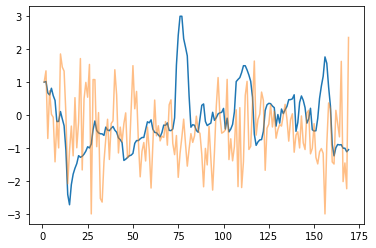

In [176]:
plt.plot(feat_arr['LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Activity'][1:])
plt.plot(feat_arr['ECOG_L_6_SMC_AT-avgref_raw'][1:], alpha=.5)

In [107]:
filename = os.path.basename(pathrun)  # gives only filename
feature_reader = nm_analysis.Feature_Reader(
    feature_dir=pathout,
    feature_file=filename
)

In [108]:
ch = "ECOG_L_1_SMC_AT-avgref"
list_feature_keywords = ["stft"]

Feature epoch average figure saved to: /Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01/examples/data/derivatives/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg/MOV_aligned_features_ch_ECOG_L_1_SMC_AT-avgref_stft.png


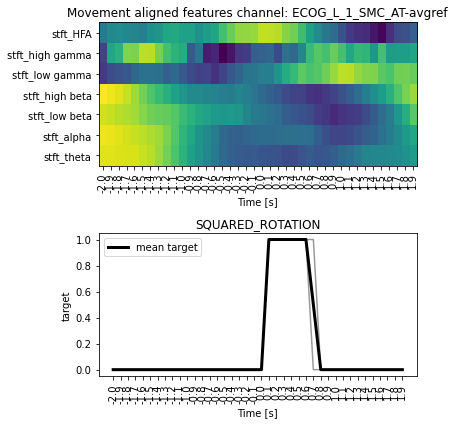

In [164]:
feature_reader.plot_target_averaged_channel(
    ch=ch,
    list_feature_keywords=list_feature_keywords,
    epoch_len=4,  # doesnt run with different epoch-length
    threshold=.5
)


In [115]:
model = linear_model.LogisticRegression(class_weight='balanced')


In [116]:
feature_reader.set_decoder(
        model = model,
        eval_method=metrics.balanced_accuracy_score,
        cv_method=model_selection.KFold(n_splits=3, shuffle=True),
        get_movement_detection_rate=True,
        min_consequent_count=2
    )

In [117]:
performances = feature_reader.run_ML_model(
        estimate_channels=True,
        estimate_gridpoints=True,
        estimate_all_channels_combined=False,
        save_results=True
)

no movements in label
no movements in label
model being saved to: /Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01/examples/data/derivatives/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg_LM_ML_RES.p


Feature epoch average figure saved to: /Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01/examples/data/derivatives/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg/PLOT_CORTEX_ch_performance_allch_allgrid.png


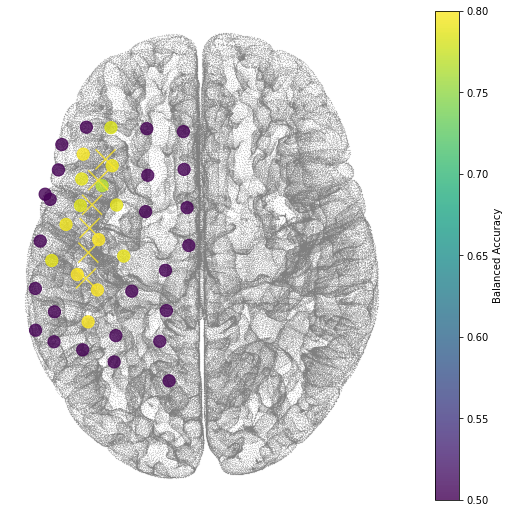

In [118]:
feature_reader.plot_subject_grid_ch_performance(performance_dict=performances, plt_grid=True)

### FeatureEstimationDemo

In [142]:
# featureEstimation example
import matplotlib.pyplot as plt

# first specify path to get example folder, second py_neuromodulation folder
PATH_PYNEUROMODULATION = Path("__file__").absolute().parent.parent  # "__file__" required for ipynb
sys.path.append(os.path.join(PATH_PYNEUROMODULATION))

PATH_PYNEUROMODULATION

# from pyneuromodulation import nm_start_BIDS, nm_settings, nm_IO, nm_define_nmchannels, nm_features
#                             #   nm_generator, nm_rereference, nm_resample, nm_run_analysis, nm_normalization, nm_projection
'''
nm_start_BIDS, nm_settings, nm_IO, ..., not present py-files in pyneuromodulation
start_BIDS, settings, IO are available as .txt-files
'''

'\nnm_start_BIDS, nm_settings, nm_IO, ..., not present py-files in pyneuromodulation\nstart_BIDS, settings, IO are available as .txt-files\n'

In [136]:
os.getcwd()

'/Users/jeroenhabets/Research/CHARITE/projects/retune_dyskinesia/code/py_neuromodulation_0_01'